In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
import random
import seaborn as sns

# Loading the Datasets 

In [2]:
boston=load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
bos_data=pd.DataFrame(boston.data)

In [5]:
bos_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos_data['Price']=boston.target

In [7]:
bos_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Preapring the datasets

In [8]:
X=bos_data.drop('Price',axis=1)
Y=bos_data['Price']
X=np.asarray(X)
Y=np.asarray(Y)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=5)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


# Implementing Stochastic Gradient Desent

In [11]:
def predict(row, w,b):
    yhat = b
    for i in range(len(row)):
        yhat += w[i] * row[i]
    return yhat

In [12]:
def linear_reg_using_sgd(train,target, l_rate, iterations, k):
    w = [0.0 for i in range(len(train[0]))]
    b = 0.0
    N = len(target)
    for iteration in range(iterations):
        sum_error = 0.0          
        row_num = random.sample(range(len(train)),k)
        for i in row_num:
            row = train[i]
            row_target = target[i]
            yhat = predict(row, w, b)
            error = yhat - row_target
            b = b - l_rate * error
            for i in range(len(row)):
                w[i] = w[i] - l_rate * error * row[i]
               

    return w,b

In [13]:
l_rate = 1e-6
iterations = 100000
k = 30
w,b = linear_reg_using_sgd(x_train,y_train, l_rate, iterations, k)
print("Wieghts")
print(w,b)   

Wieghts
[-0.16280758556698993, 0.053711952897757452, -0.042355391310280426, 0.20816155111571924, 0.22804823950559494, 5.1329201008897298, -0.0010601007043988728, -0.85032126751050363, 0.21332286444996279, -0.014507242586833438, -0.32165830592057998, 0.018266549143634316, -0.44068377160215738] 0.547339542467


# Predicting the price with the optimal value of w and b

In [14]:
prediction = []
w = np.asarray(w)
b = b
for test_row in x_test:
    predi = predict(test_row,w,b)
    prediction.append(predi)   

In [15]:
pre_t=np.asarray(prediction)

In [16]:
pre_t.shape

(167,)

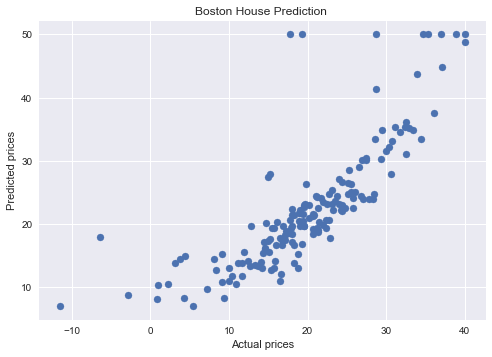

In [17]:
import matplotlib.pyplot as plt
plt.scatter(pre_t, y_test)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Boston House Prediction ")
plt.show()

In [18]:
mean_squared_error(prediction,y_test)

39.904293997840576

# Distribution of the error

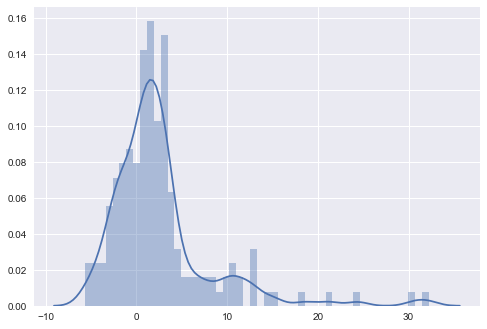

In [19]:
sns.distplot((y_test-prediction),bins=50);
plt.show()

# Implementing SGDRegressor

In [20]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
lr=SGDRegressor(max_iter=100000,eta0=1e-6)

In [22]:
lr.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-06,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [23]:
prediction_sgd=lr.predict(x_test)

In [35]:
w_sklearn=lr.coef_
w=np.array(w)

In [26]:
print(mean_squared_error(y_test,prediction_sgd))

40.8806873875


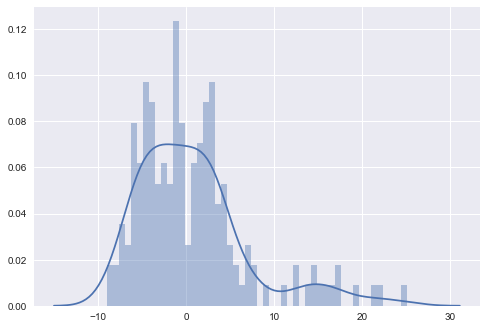

In [27]:
sns.distplot((y_test- prediction_sgd),bins=50);
plt.show()

In [28]:
lr.intercept_

array([ 0.19186664])

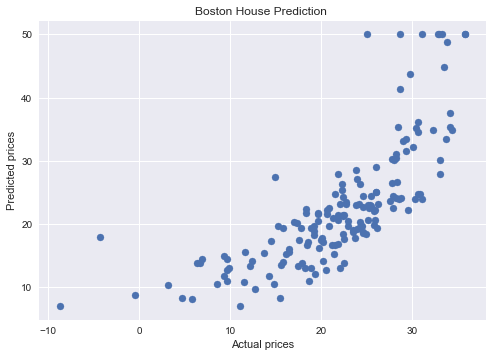

In [29]:
import matplotlib.pyplot as plt
plt.scatter(prediction_sgd, y_test)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Boston House Prediction ")
plt.show()

# Difference in both the weight vectors

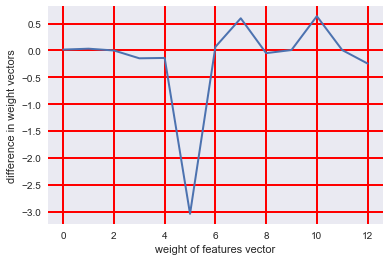

In [41]:
diff=[]
for i in range(w.size):
    diff.append(w_sklearn[i]- w[i])

plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(diff,linewidth=2)
plt.axis('tight')
plt.grid(color='r',linewidth=2,linestyle='-')
plt.xlabel('weight of features vector')
plt.ylabel('difference in weight vectors')
plt.show()  

# Conclusion: I have first Applied the stochastic gradient descent without the sklearn function , I have got the optimal value of the w and b , 
 # Now I have crossed checked my implementation with the SGDRegressor from the sklearn and I am very happy that both results matched with a  good extent. But there is significant difference in fifth weight vector but in the rest of the weight vectors there is not any significant change in the weight vectors